In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import os

In [125]:
keras.backend.backend()

'tensorflow'

In [126]:
from keras.datasets import fashion_mnist

In [127]:
fashion_mnist.load_data()


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [128]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [129]:
x_train.shape


(60000, 28, 28)

In [130]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

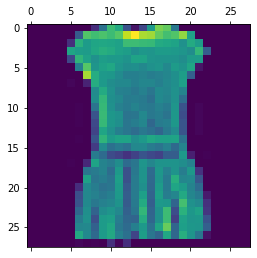

In [131]:
plt.matshow(x_train[3])

In [132]:
y_train[3]

3

In [133]:
x_train = x_train / 255
x_test - x_test / 255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [134]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [135]:
model = Sequential()


In [136]:
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [137]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [139]:
model.fit(x_train, y_train)

Epoch 1/1
60000/60000 [==============================] - 5s 88us/step - loss: 0.5897 - accuracy: 0.7969


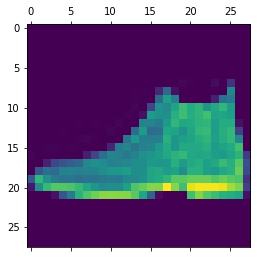

In [140]:
plt.matshow(x_test[0])

In [141]:
x_test.shape

(10000, 28, 28)

In [142]:
yp = model.predict(x_test)

In [143]:
yp[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [144]:
np.argmax(yp[0])

9

In [145]:
np.argmax(yp[5])

1

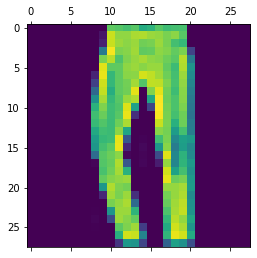

In [146]:
plt.matshow(x_test[5])

In [147]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 30us/step


[68.07349476318359, 0.8197000026702881]

In [148]:
file_path = "/Users/michaeldac/Code/CUNY/698/Downloaded_Skulls"
os.listdir(file_path)
for filename in os.listdir(file_path):
    print(filename)

717_2_6.npy
.DS_Store
711_2_6.npy
717_2_8.npy
930.npy
475.npy


In [149]:
files = [f for f in os.listdir(file_path) if 'npy' in f]

In [150]:
files

['717_2_6.npy', '711_2_6.npy', '717_2_8.npy', '930.npy', '475.npy']

In [151]:
train = files[0:4]
train

['717_2_6.npy', '711_2_6.npy', '717_2_8.npy', '930.npy']

In [152]:
test = files[-1:]
test

['475.npy']

In [153]:
train_arrays = []
for a in train:
    npy_file = np.load(f'{file_path}/{a}', allow_pickle=True)
    train_arrays.append(npy_file)

train_arrays[0][1]

array([[ 96.59409599,  59.5882146 ,  69.79175118],
       [ 71.83131911,  89.12392332,  71.47332042],
       [ 61.3034296 , 119.39825303,  46.13452461],
       [ 48.39267488,  87.26814172,  69.01842097],
       [ 28.92997682,  51.72417509,  61.36640549]])

In [154]:
x_train = np.array([a[0] for a in train_arrays])
x_train.shape

(4, 128, 128, 128)

In [159]:
y_train = np.array([a[1] for a in train_arrays])
y_train


array([[[ 96.59409599,  59.5882146 ,  69.79175118],
        [ 71.83131911,  89.12392332,  71.47332042],
        [ 61.3034296 , 119.39825303,  46.13452461],
        [ 48.39267488,  87.26814172,  69.01842097],
        [ 28.92997682,  51.72417509,  61.36640549]],

       [[ 53.89406192,  94.46768372,  78.08546501],
        [ 38.93116384,  48.88078141,  79.87829059],
        [  3.96365172,  18.25918367,  52.33855203],
        [ 53.35275085,  29.35664902,  72.02365359],
        [ 97.57439592,  37.55823866,  51.47676374]],

       [[ 30.37501251,  70.57342738,  90.79245858],
        [ 34.47854797,  74.23058555,  42.14836227],
        [ 51.23542186, 119.08083913,   6.07319893],
        [ 59.95188843,  68.76993938,  29.35475069],
        [ 99.32213213,  46.42574487,  52.35694864]],

       [[ 95.78474194,  61.58528839,  76.1920257 ],
        [ 75.19334545,  63.94358288,  38.94429995],
        [ 63.98408269,  32.79961152,   5.80429694],
        [ 56.15024215,  66.35484486,  37.62918822],
      

In [184]:
y_train2 = []
for i in range(len(y_train)):
    y = y_train[i].flatten()
    y_train2.append(y)

y_train2 = np.array(y_train2)
y_train2.shape

(4, 15)

In [46]:
test_arrays = []
for a in test:
    npy_file = np.load(f'{file_path}/{a}', allow_pickle=True)
    test_arrays.append(npy_file)
    


In [67]:
x_test = np.array([a[0] for a in test_arrays])
y_test = np.array([a[1] for a in test_arrays])

In [123]:

x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [122]:
y_test.flatten()
y_tst

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [79]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, Conv3D, MaxPooling3D

In [191]:
model = Sequential()

model.add(Flatten(input_shape=[128,128,128]))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [187]:
# model.add(Flatten(input_shape=[128,128,128]))
# model.add(Conv3D(32, kernel_size=(3,3,3), strides=(1,1,1), input_shape=(128,128,128,1)))
# model.add(Dense(20, activation='relu'))
# model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), input_shape=(128,128,1)))
# model.add(Activation('relu'))
# model.add(Dense(10, activation='softmax'))
# model.add(MaxPooling3D(pool_size=(2,2,2)))

In [188]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 8388608)           0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                167772180 
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
Total params: 167,772,390
Trainable params: 167,772,390
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [190]:
model.fit(x_train, y_train2)

ValueError: Error when checking input: expected flatten_12_input to have 5 dimensions, but got array with shape (4, 128, 128, 128)